In [1]:
### Bike Sharing  Project
#Exploratory Data Analysis (EDA)

In [2]:
##=================================================================
##              Importing Necessary Modules
##=================================================================

import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step 1**: Get the data
**Description of Data**

**instant**: record index

**dteday** : date

**season** : season (1:winter, 2:spring, 3:summer, 4:fall)

**yr** : year (0: 2011, 1:2012)

**mnth** : month ( 1 to 12)

**hr** : hour (0 to 23)

**holiday** : weather day is holiday or not (extracted from [Web Link])

**weekday** : day of the week

**workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.

**weathersit** :

__1: Clear, Few clouds, Partly cloudy, Partly cloudy__

__2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist__
 
__3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds__
 
__4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog__

**temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

**atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

**hum**: Normalized humidity. The values are divided to 100 (max)

**windspeed**: Normalized wind speed. The values are divided to 67 (max)

**casual**: count of casual users

**registered**: count of registered users

**cnt**: count of total rental bikes including both casual and registered

In [3]:
##=================================================================
##             Reading the data
##=================================================================
url=('https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/bike_rentals.csv')
bike = pd.read_csv(url)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB


In [5]:
#checking the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Looking for missing data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64

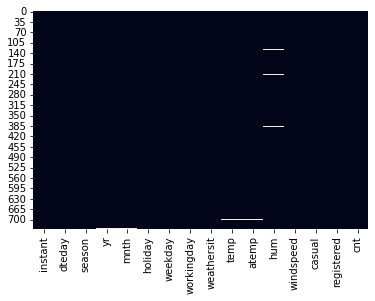

In [7]:
#====================================================
# Using heatmap to check for missing values
#----------------------------------------------------
sns.heatmap(bike.isnull(), cbar = False)

In [9]:
#replacing the missing numeric data by mean
mean1 = bike['temp'].mean()
mean2 = bike['atemp'].mean()
mean3 = bike['hum'].mean()
mean4 = bike['windspeed'].mean()

bike['temp']=bike['temp'].fillna(mean1)
bike['atemp']=bike['atemp'].fillna(mean2)
bike['hum']=bike['hum'].fillna(mean3)
bike['windspeed']=bike['windspeed'].fillna(mean4)


In [10]:
#replacing the missing non-numeric data by idmax
temp1 = bike.groupby('yr')['instant'].count().idxmax()
temp2 = bike.groupby('mnth')['instant'].count().idxmax()
bike['yr']=bike['yr'].fillna(temp1)
bike['mnth']=bike['mnth'].fillna(temp2)

In [11]:
#Rename the columns
bike.rename(columns={'instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [12]:
#Type casting the datetime and numerical attributes to category

bike['datetime']=pd.to_datetime(bike.datetime)
bike['season']=bike.season.astype('category')
bike['year']=bike.year.astype('category')
bike['month']=bike.month.astype('category')
bike['holiday']=bike.holiday.astype('category')
bike['weekday']=bike.weekday.astype('category')
bike['workingday']=bike.workingday.astype('category')
bike['weather_condition']=bike.weather_condition.astype('category')
bike.head()

,id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [17]:
! pip install researchpy
import researchpy as rp
rp.summary_cat(bike[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition',]])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Variable,Outcome,Count,Percent
0,season,3.0,188,25.72
1,,2.0,184,25.17
2,,1.0,181,24.76
3,,4.0,178,24.35
4,year,0.0,366,50.07
5,,1.0,365,49.93
6,month,1.0,63,8.62
7,,3.0,62,8.48
8,,5.0,62,8.48
9,,7.0,62,8.48


In [18]:
bike.isnull().sum()

id                   0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [19]:
bike.duplicated().sum()

0

In [20]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
id,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
temp,731.0,0.495587,0.182969,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474512,0.162905,0.079070,0.337842,0.486733,0.608602,0.840896
humidity,731.0,0.627987,0.142038,0.000000,0.522291,0.627987,0.729791,0.972500
windspeed,731.0,0.190476,0.077458,0.022392,0.134950,0.181596,0.233206,0.507463
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registered,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000
total_count,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


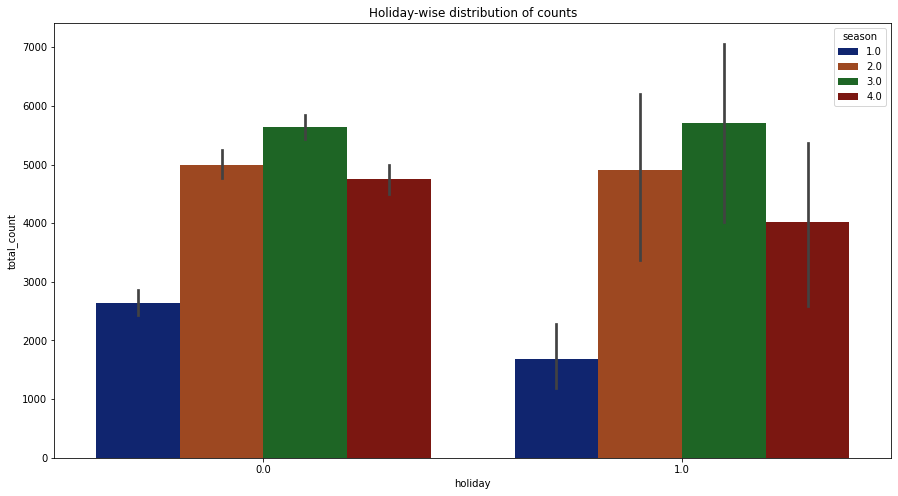

In [21]:
#Presentation of Holiday , count by season (Barplot)
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=bike,x='holiday',y='total_count',hue='season', palette='dark')
ax.set_title('Holiday-wise distribution of counts')
total = float(len(bike['season']))


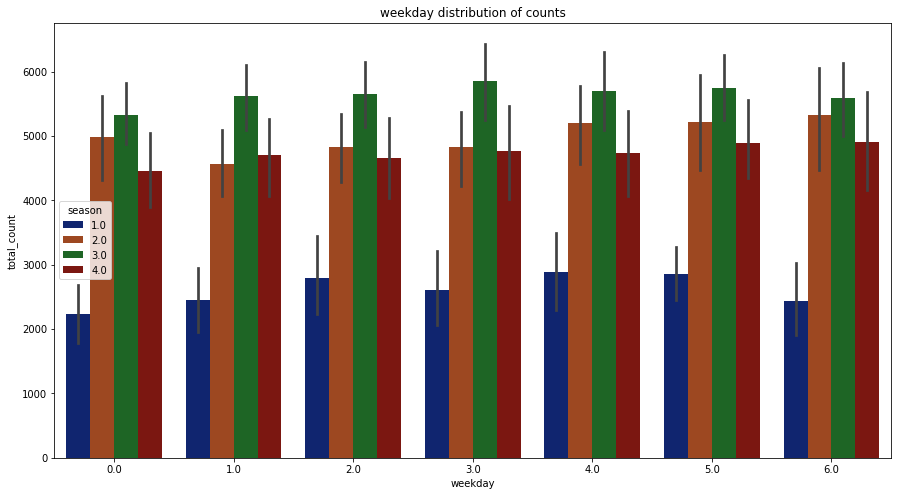

In [22]:
#Presentation of Holiday , count by season (Barplot)
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=bike,x='weekday',y='total_count',hue='season', palette='dark')
ax.set_title('weekday distribution of counts')
plt.show()

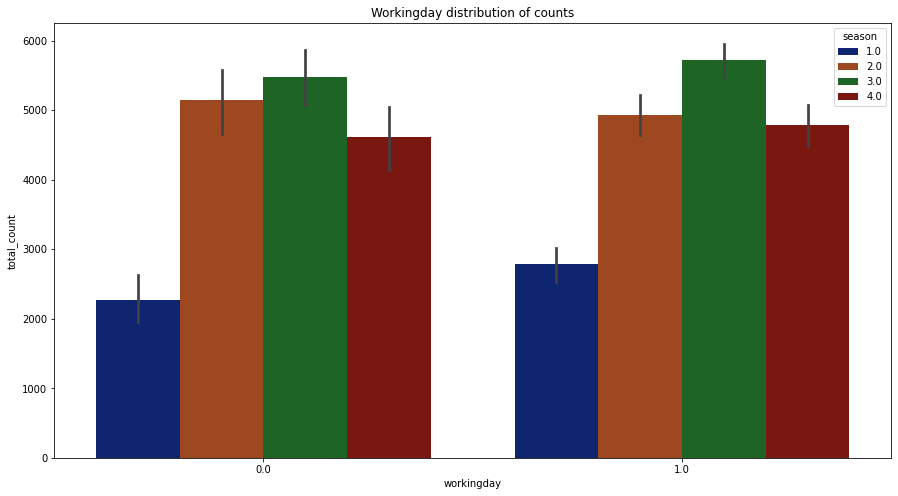

In [23]:
#Presentation of Holiday , count by season (Barplot)
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=bike,x='workingday',y='total_count',hue='season', palette='dark')
ax.set_title('Workingday distribution of counts')
plt.show()

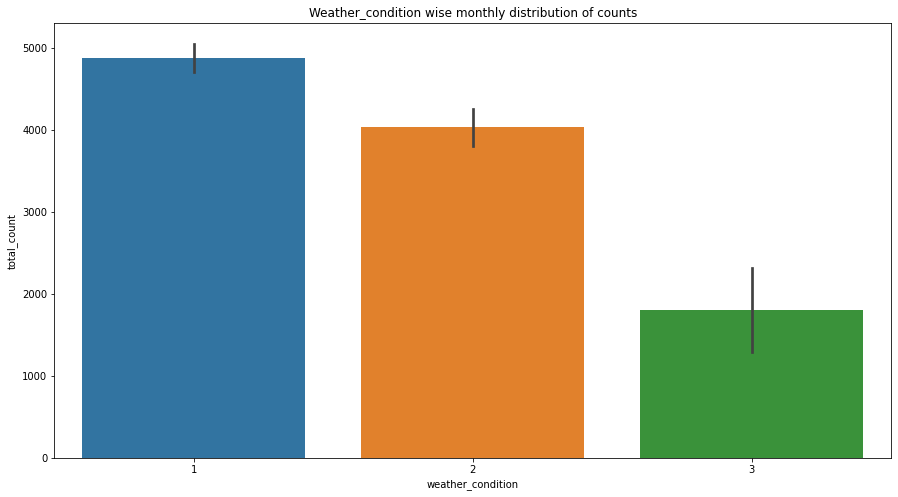

In [24]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike,ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

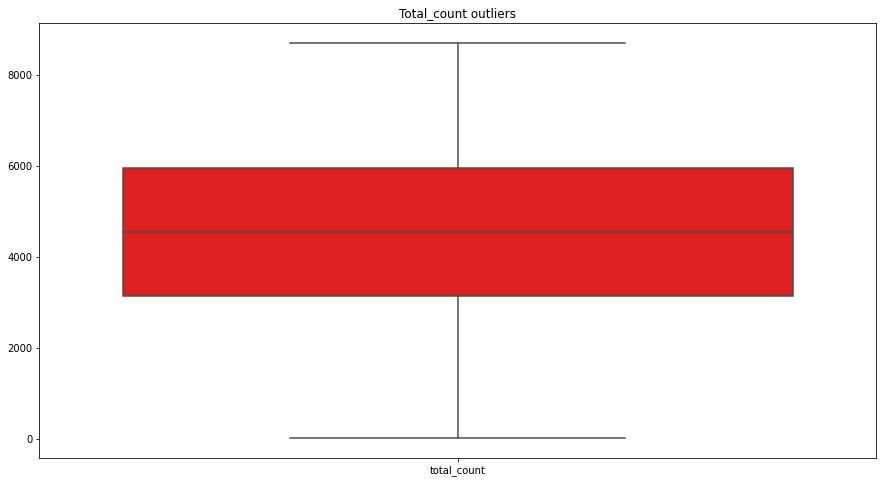

In [25]:
#Outlier analysis
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike[['total_count']], color='r')
ax.set_title('Total_count outliers')
plt.show()

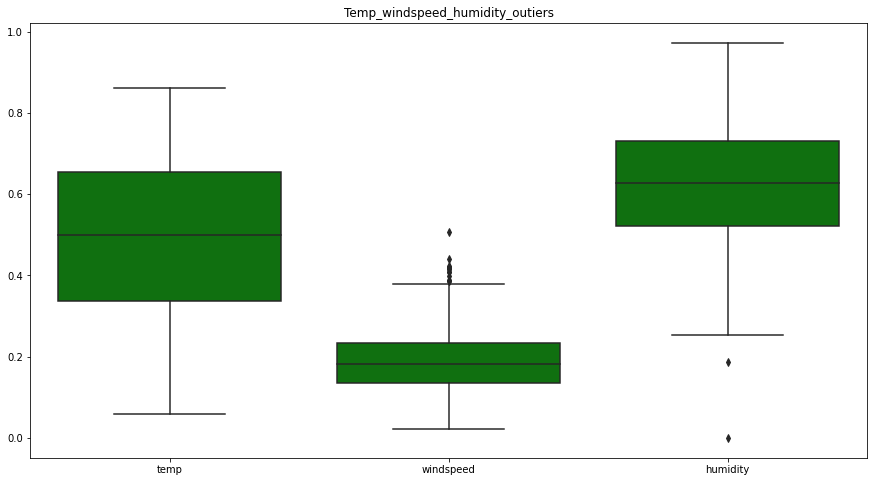

In [57]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike[['temp','windspeed','humidity']], color='g')

ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

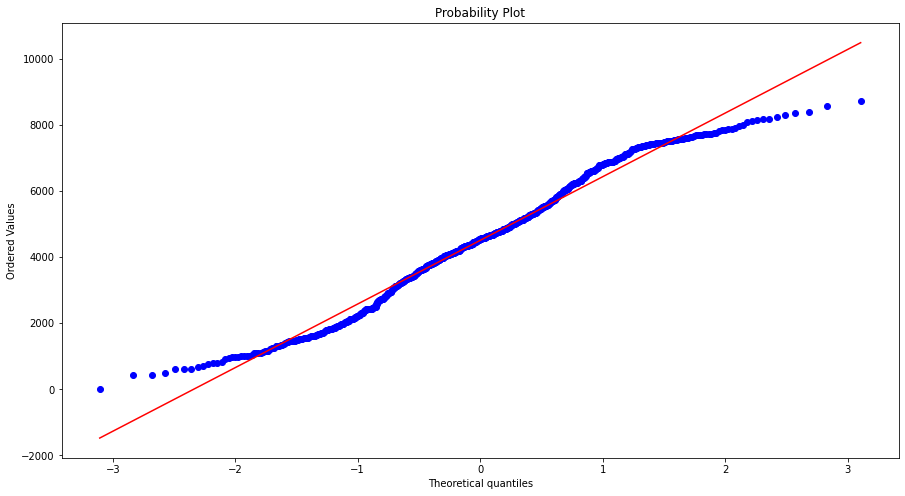

In [58]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike.total_count.tolist(),dist='norm',plot=plt)
plt.show()

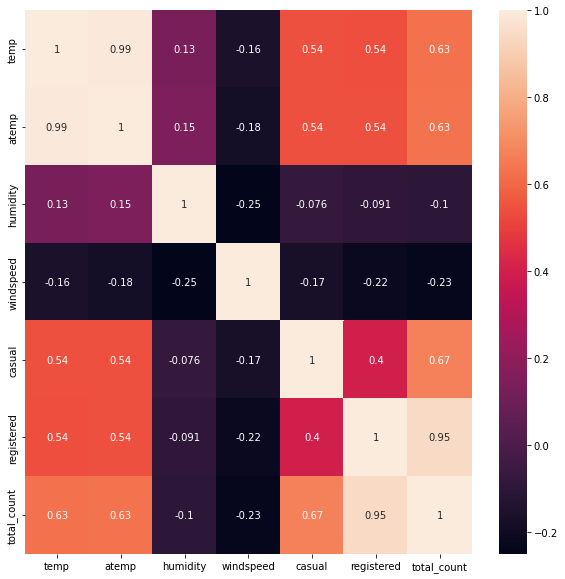

In [61]:
#Create the correlation matrix
corr=bike[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
ax.set_title('Correlation matrix of features')
plt.show()

In [67]:
## Split the dataset into the train and test data
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bike.iloc[:,0:-3],bike.iloc[:,-1],test_size=0.3, random_state=42)

# Train Data
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Test Data
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())


(511, 14) (220, 14) (511, 2) (220, 2)
   index  total_count
0    223         4905
1    684         5445
2    685         5698
3    163         5020
4    394         3624
   index  total_count
0    703         6606
1     33         1550
2    300         3747
3    456         6041
4    633         7538


In [69]:
## Split the features into categorical and numerical features
#Create a new dataset for train feature
train_feature=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#Create a new dataset for test feature
test_feature=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical feature
cat_feature=['season','holiday','workingday','weather_condition','year']
#numerical feature
num_feature=['temp','windspeed','humidity','month','weekday']


In [70]:
#To get dummy variables to encode the categorical features to numeric
train_encoded=pd.get_dummies(train_feature,columns=cat_feature)
print('Shape of transfomed dataframe::',train_encoded.shape)
train_encoded.head()

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1.0,season_2.0,season_3.0,season_4.0,holiday_0.0,holiday_1.0,workingday_0.0,workingday_1.0,weather_condition_1,weather_condition_2,weather_condition_3,year_0.0,year_1.0
0,8.0,5.0,0.415000,0.708333,0.125621,0,0,1,0,1,0,0,1,1,0,0,1,0
1,11.0,4.0,0.620417,0.321667,0.152987,0,0,0,1,1,0,0,1,0,1,0,0,1
2,11.0,5.0,0.524583,0.345000,0.171025,0,0,0,1,1,0,0,1,1,0,0,0,1
3,6.0,1.0,0.494583,0.635000,0.305350,0,1,0,0,1,0,0,1,1,0,0,1,0
4,1.0,1.0,0.400833,0.269167,0.215792,1,0,0,0,1,0,0,1,1,0,0,0,1


In [71]:
#Training dataset for modelling
X_train=train_encoded
y_train=y_train.total_count.values

In [74]:
## Linear Regression Model

#training model
lm_model=linear_model.LinearRegression()
lm_model

LinearRegression()

In [75]:
#fit the trained model
lm_model.fit(X_train,y_train)

LinearRegression()

In [76]:
## Accuracy of model

#Accuracy of the model
lm=lm_model.score(X_train,y_train)
print('Accuracy of the model :',lm)
print('Model coefficients :',lm_model.coef_)
print('Model intercept value :',lm_model.intercept_)

Accuracy of the model : 0.8140894326748532
Model coefficients : [  -28.14987031    68.25903696 -1000.34007663  5200.41404388
 -2571.96133143  -965.08541766   228.82990911   -63.96804255
   800.22355111   231.61011466  -231.61011466   -74.57504312
    74.57504312   781.42175024   275.69911278 -1057.12086302
  -984.52177544   984.52177544]
Model intercept value : 2217.2036838752147


In [77]:
#Cross validation prediction
predict=cross_val_predict(lm_model,X_train,y_train,cv=3)
predict

array([ 5251.49306921,  5025.50897197,  5804.87497307,  4358.64010405,
        3739.44075835,  6758.80036287,  6248.13012834,  3796.23674061,
        4679.08942946,  3415.85390803,  5391.11394033,  3126.76860605,
        4348.62443243,  5781.17804709,  4357.43761649,  6301.32648027,
        4376.91725604,  3355.72896004,   724.92028853,   561.92101979,
        7404.69130411,  3738.83385214,  5267.54064496,  5494.45295096,
        6936.64559733,  7309.54868781,  3638.89149978,  3558.88698367,
        1004.91587816,  4885.46677104,  1654.64864743,  1706.56052095,
        1698.23875652,  1291.4880176 ,  4899.49638963,  5495.76638582,
        5991.42036029,  4189.43627056,  5080.78667366,  5953.52054593,
        6392.10186294,  4208.67988975,  5946.91641341,  6042.27071342,
        3350.73355216,  4094.03062749,  1463.81702537,  3597.46267737,
        4595.3195736 ,  6645.73527274,  1711.5780511 ,  6125.2167578 ,
        6445.98703434,  3275.94787464,  4575.15566887,  3196.2982477 ,
      

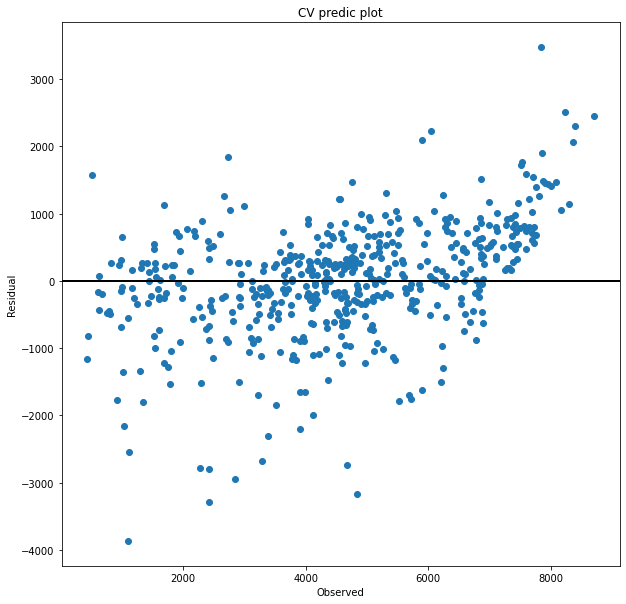

In [78]:
# CV plot
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('CV predic plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [81]:
## Model_evalution_metrics

# Rmse

#R-squared scores
Rsquer = cross_val_score(lm_model, X_train, y_train, cv=3)
print('Rsquer :',np.average(Rsquer))

Rsquer : 0.7976757703089904


In [83]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_feature=pd.get_dummies(test_feature,columns=cat_feature)
print('Shape of transformed dataframe :',test_encoded_feature.shape)
test_encoded_feature.head()

Shape of transformed dataframe : (220, 18)


,month,weekday,humidity,temp,windspeed,season_1.0,season_2.0,season_3.0,season_4.0,holiday_0.0,holiday_1.0,workingday_0.0,workingday_1.0,weather_condition_1,weather_condition_2,weather_condition_3,year_0.0,year_1.0
0,12.0,2.0,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2.0,4.0,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10.0,5.0,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4.0,0.0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9.0,2.0,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [85]:
### Model performance on test dataset
#Test dataset for prediction
X_test=test_encoded_feature
y_test=y_test.total_count.values

In [86]:
## Predict the model

lm_pred=lm_model.predict(X_test)
lm_pred

array([6180.95157843, 1391.85131628, 3218.81144866, 4845.65394554,
       6654.95056619, 6936.25768459,  718.24766766, 1908.35283118,
       6974.91782808, 6826.65695751, 2782.11285065, 2106.87826386,
       4458.81521896, 5478.83006538, 2197.1097195 , 1842.57988016,
       2180.98149819, 7446.36555141, 5497.57744954, 2622.34294934,
       6925.45023129, 7821.41172942, 5532.38280721, 1270.72836623,
       1261.83578939, 4481.31957664, 2638.29684149, 6719.00519929,
       3857.76326635, 5788.85814881, 3120.67755523, 4246.83388215,
       6355.61471206, 6783.57469666, 5788.40341848, 5420.05368963,
       6688.26342049, 5854.021848  , 3180.52872776,  836.47597835,
       4498.94510234, 3746.28893962, 6895.40221891, 4087.51445731,
       6902.45936893, 1625.77935588, 4803.99725349, 4711.35483801,
       6356.6722629 , 4605.06377234, 3117.01672473, 2849.87972506,
       1818.79531802, 5602.21511181, 4625.90293389, 4096.92021543,
       4696.26985736, 3066.47151819, 4361.22696097, 6620.65941

In [87]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lm_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lm_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 781.4329039639008
Mean absolute error : 593.4197275999385


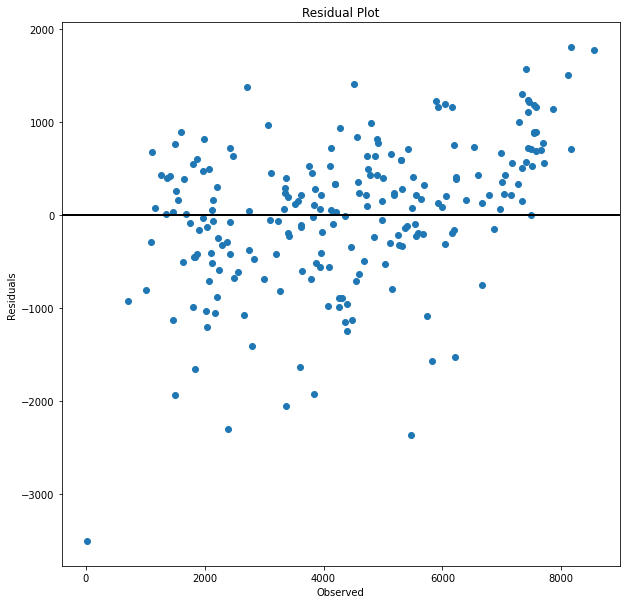

In [88]:
#Residual plot
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_test-lm_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

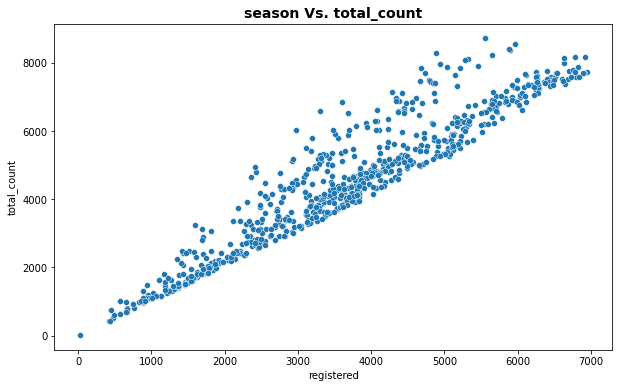

In [63]:
# Draw the scatter plot
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x = 'registered',
                y = 'total_count', 
                data = bike)
plt.title("season Vs. total_count", fontsize=14, fontweight = "bold")

# Show the plot
plt.show()

In [64]:
# Import the ols function
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create the model object
model = ols( "total_count ~ registered", data= bike) 

# Fit the model
model = model.fit()

# Print the parameters of the fitted model
print(model.params)

Intercept     212.177734
registered      1.173952
dtype: float64


In [65]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     6149.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:30:19   Log-Likelihood:                -5749.4
No. Observations:                 731   AIC:                         1.150e+04
Df Residuals:                     729   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.1777     59.508      3.566      0.0

In [ ]:
instant':'id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count

In [89]:
## Decision tree regressor

#training the model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [90]:
## Fit the model
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [91]:
## Decision tree regression accuracy score

#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.8084747203148798


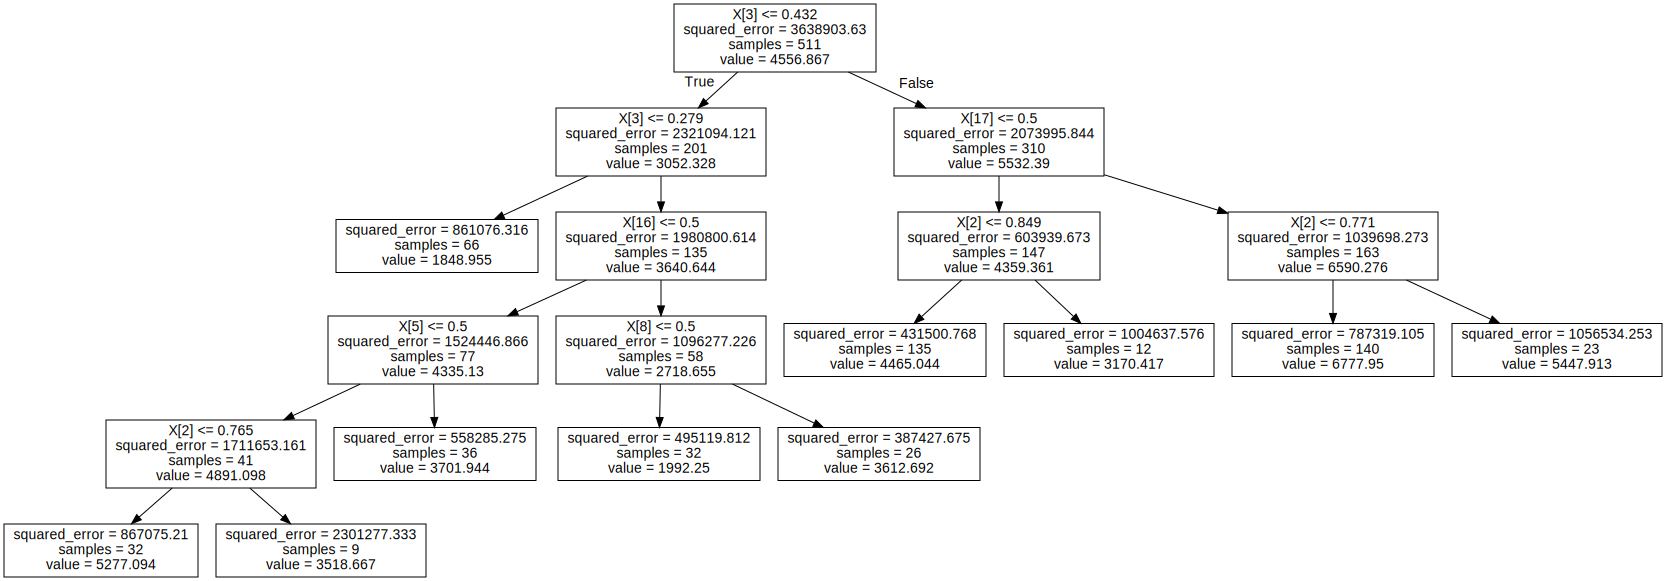

In [92]:
## Plot the learned model

#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [93]:
## CV prediction

predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([4513.38554217, 4591.31111111, 4591.31111111, 4513.38554217,
       2558.6       , 5347.38888889, 6824.96969697, 4591.31111111,
       4591.31111111, 3603.92857143, 6824.96969697, 3194.22222222,
       4513.38554217, 6824.96969697, 4513.38554217, 6824.96969697,
       3603.92857143, 1636.81818182, 1636.81818182, 1636.81818182,
       6824.96969697, 2558.6       , 4591.31111111, 1027.        ,
       6824.96969697, 6824.96969697, 2558.6       , 4591.31111111,
       1636.81818182, 4513.38554217, 1636.81818182, 1636.81818182,
       1636.81818182, 1636.81818182, 4513.38554217, 5347.38888889,
       6824.96969697, 4591.31111111, 4513.38554217, 6824.96969697,
       6824.96969697, 4513.38554217, 6824.96969697, 6824.96969697,
       4513.38554217, 3194.22222222, 1636.81818182, 4591.31111111,
       4513.38554217, 6824.96969697, 3194.22222222, 6824.96969697,
       6824.96969697, 3603.92857143, 4513.38554217, 1027.        ,
       1636.81818182, 4513.38554217, 1636.81818182, 4513.38554

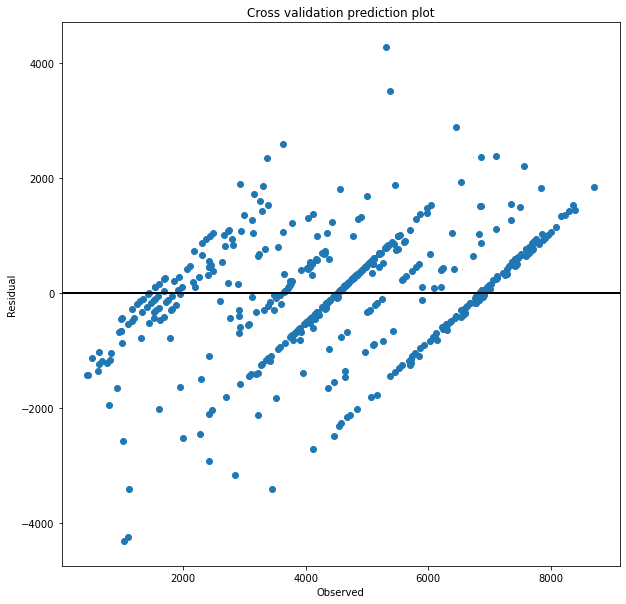

In [107]:
# Cross validation prediction plot
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [108]:
#R-squar scores
Rsquer1 = cross_val_score(dtr, X_train, y_train, cv=3)
print('Rsquer1 :',np.average(Rsquer1))

Rsquer1 : 0.7280569840177501


In [112]:
## Model performance on test dataset
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([6777.95      , 1848.95454545, 3612.69230769, 5277.09375   ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       6777.95      , 6777.95      , 1848.95454545, 1992.25      ,
       4465.04444444, 5277.09375   , 1992.25      , 1992.25      ,
       1992.25      , 6777.95      , 4465.04444444, 1848.95454545,
       6777.95      , 6777.95      , 5277.09375   , 1848.95454545,
       1992.25      , 4465.04444444, 1992.25      , 6777.95      ,
       1848.95454545, 5277.09375   , 1848.95454545, 4465.04444444,
       6777.95      , 6777.95      , 6777.95      , 5447.91304348,
       6777.95      , 6777.95      , 4465.04444444, 1848.95454545,
       4465.04444444, 1848.95454545, 6777.95      , 4465.04444444,
       6777.95      , 3612.69230769, 4465.04444444, 6777.95      ,
       6777.95      , 5447.91304348, 4465.04444444, 1848.95454545,
       1992.25      , 4465.04444444, 4465.04444444, 4465.04444444,
       3170.41666667, 4465.04444444, 4465.04444444, 6777.95   

In [113]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 924.7349824379328
Mean absolute error : 667.6518372075881


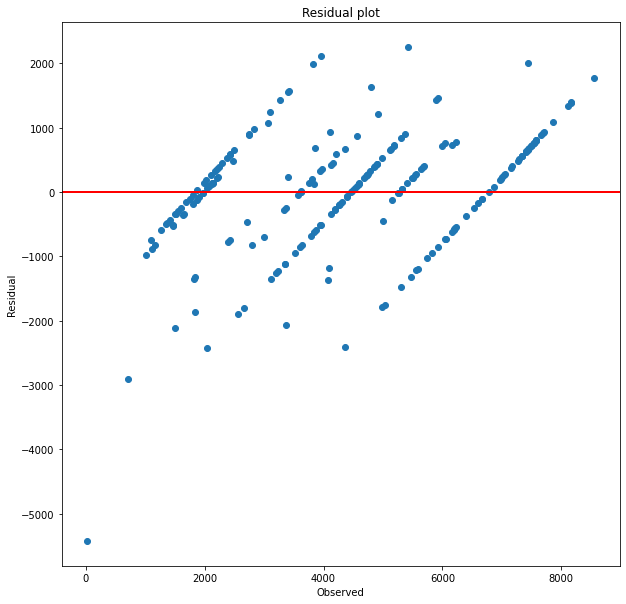

In [114]:
## Residual plot

#Residual scatter plot
residuals = y_test-dtr_pred
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.set_title('Residual plot')
plt.show()

In [101]:
## Random Forest
#Training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded
rf=RandomForestRegressor(n_estimators=100)

In [102]:
## Fit the model

#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
# accuracy of RF
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.980406718643754


In [104]:
#Cross validation prediction
pred=cross_val_predict(rf,X_train,y_train,cv=3)
pred

array([4953.25, 4625.24, 5207.23, 4798.  , 3120.14, 5505.57, 6578.24,
       3665.2 , 4352.4 , 3627.88, 5911.56, 3483.5 , 4275.34, 6979.21,
       4839.68, 6573.22, 4112.46, 2517.97, 1198.75, 1471.47, 6189.42,
       3364.52, 4631.65, 4411.84, 7157.06, 6241.41, 3157.66, 4223.91,
       1464.27, 4944.79, 1053.99, 1772.21, 1455.18, 1974.02, 4721.41,
       4682.83, 6748.44, 4009.86, 4342.66, 6100.87, 6580.16, 4334.48,
       7074.12, 6260.67, 4423.17, 3332.72, 1315.92, 3985.97, 4624.11,
       6654.44, 2881.99, 6316.41, 6627.68, 3491.98, 4941.82, 3363.46,
       1418.92, 4093.31, 1102.03, 4606.56, 5434.07, 4046.08, 3707.2 ,
       5334.99, 4533.73, 6785.47, 4600.83, 3198.93, 3865.42, 4151.78,
       3623.48, 4391.2 , 7066.05, 3793.98, 5027.95, 2470.22, 2590.58,
       4569.33, 2331.75, 4207.48, 4343.32, 4740.35, 4190.3 , 2159.22,
       7546.09, 4335.49, 4669.78, 7288.1 , 4628.16, 4192.12, 1442.4 ,
       2554.14, 1924.  , 7175.79, 6771.66, 4812.94, 4283.63, 4739.84,
       3523.48, 2023

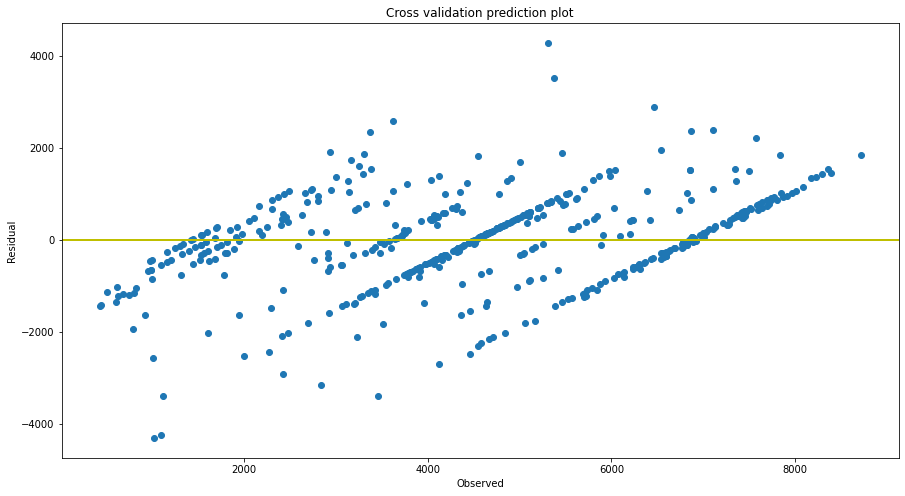

In [115]:
## CV prediction plot
#Cross validation prediction plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='y')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [116]:
#R-squared scores
Rsquer2 = cross_val_score(rf, X_train, y_train, cv=3)
print('Rsquer2 :',np.average(Rsquer2))

Rsquer2 : 0.8454372782231404


In [118]:
## Performance Model
#predict the model
X_test=test_encoded_feature
rf_pred=rf.predict(X_test)
rf_pred

array([6650.3 , 1516.93, 3505.45, 5369.47, 7438.15, 7292.17, 1416.41,
       2299.07, 7310.06, 6334.65, 2118.74, 2948.34, 5010.62, 5050.14,
       2013.17, 2080.75, 2234.03, 7814.7 , 5028.58, 2435.59, 7503.56,
       6021.39, 5898.53, 1852.22, 1736.38, 4682.06, 2054.06, 7213.86,
       3230.58, 5731.96, 3006.32, 4045.84, 6562.51, 7432.22, 6230.8 ,
       5302.89, 7217.35, 6244.8 , 3160.84,  885.67, 3777.62, 3235.68,
       7296.19, 4481.05, 7022.58, 2273.57, 4371.98, 5574.4 , 6573.04,
       4208.67, 4222.07, 2959.84, 2261.03, 4333.09, 4653.91, 4206.95,
       3398.51, 3913.54, 4256.6 , 6586.07, 6112.58, 6859.54, 2000.64,
       7324.69, 6443.61, 6450.88, 5830.78, 4421.66, 1783.74, 7301.37,
       3686.24, 2019.5 , 3269.91, 3935.83, 4313.12, 3906.51, 4765.53,
       4483.37, 1356.61, 4283.55, 2108.7 , 2051.64, 5059.78, 4012.55,
       3656.36, 3464.69, 3848.39, 3741.12, 3383.8 , 3324.89, 1365.25,
       7064.36, 5704.79, 5788.85, 2302.79, 2193.39, 4747.47, 2778.76,
       3071.35, 4800

In [119]:
# RMSE & MAE
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 635.6129705142188
Mean absolute error : 427.6830454545454


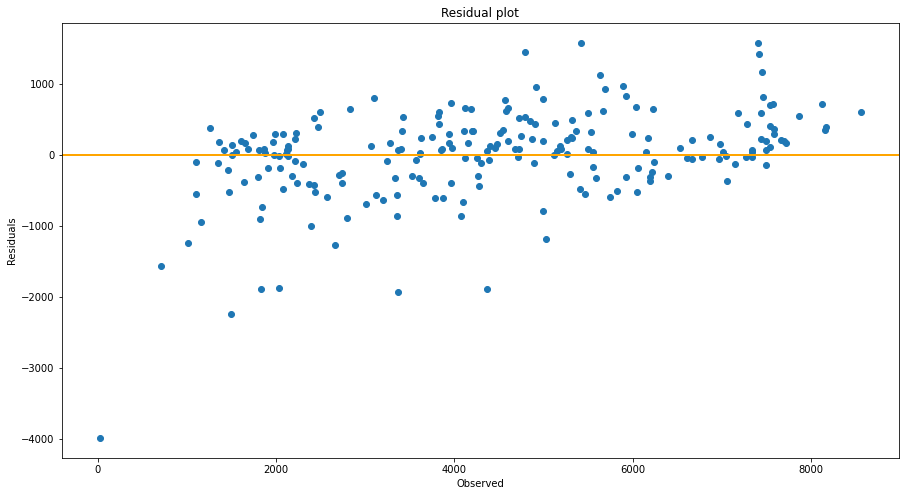

In [122]:
#Residual scatter plot
fig, ax = plt.subplots(figsize=(15,8))
residuals=y_test-rf_pred
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='orange')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()

In [123]:
# predic Model

Bike1=pd.DataFrame(y_test,columns=['y_test'])
Bike2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predic=pd.merge(Bike1,Bike2,left_index=True,right_index=True)
Bike_predic.to_csv('Bike_rent.csv')
Bike_predic

,y_test,rf_pred
0,6606,6650.30
1,1550,1516.93
2,3747,3505.45
3,6041,5369.47
4,7538,7438.15
...,...,...
215,2659,3933.59
216,7338,7272.91
217,6978,6826.88
218,4795,3347.65
